<a href="https://colab.research.google.com/github/maimuna-noshin/Solar_Prediction/blob/main/Solar_Irradiance_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Solar Irradiance Prediction with Machine Learning

## Dataset

## Aim

### Importing Required Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

### Importing The Dataset

In [2]:
dataset = pd.read_csv('/content/SolarIrradianceDataset.csv')

# Taking first 1000 rows
# Comment out this line if full dataset to be fed
# dataset = dataset.head(10000)

dataset.head()

Year  MonthOfYear  DayOfYear  TimeOfDay(Hour)  TimeOfDay(Minute)  \
0  2020            1          1                0                  0   
1  2020            1          1                0                 10   
2  2020            1          1                0                 20   
3  2020            1          1                0                 30   
4  2020            1          1                0                 40   

   Temperature  DewPoint  DiffuseHorizontalIrradiance(DHI)  \
0         13.4      12.8                                 0   
1         13.3      12.8                                 0   
2         13.2      12.8                                 0   
3         13.2      12.8                                 0   
4         13.1      12.6                                 0   

   GlobalHorizontalIrradiance(GHI)  SurfaceAlbedo  Pressure  WindDirection  \
0                                0           0.12      1013            340   
1                                0           0.12      1013            340   
2                                0           0.12      1013            341   
3                                0           0.12      1013            341   
4                                0           0.12      1013            342   

   WindSpeed  ClearskyDNI  CloudType  SolarZenithAngle  RelativeHumidity  \
0        1.6            0          0            179.17             96.37   
1        1.6            0          0            177.99             96.99   
2        1.6            0          0            175.77             97.63   
3        1.6            0          0            173.50             97.63   
4        1.6            0          0            171.22             96.97   

   Radiation(DNI)  
0               0  
1               0  
2               0  
3               0  
4               0

### Exploratory Data Analysis (EDA)

In [3]:
dataset.columns

Index(['Year', 'MonthOfYear', 'DayOfYear', 'TimeOfDay(Hour)',
       'TimeOfDay(Minute)', 'Temperature', 'DewPoint',
       'DiffuseHorizontalIrradiance(DHI)', 'GlobalHorizontalIrradiance(GHI)',
       'SurfaceAlbedo', 'Pressure', 'WindDirection', 'WindSpeed',
       'ClearskyDNI', 'CloudType', 'SolarZenithAngle', 'RelativeHumidity',
       'Radiation(DNI)'],
      dtype='object')

In [4]:
dataset.shape

(263088, 18)

In [5]:
dataset.describe()

Year    MonthOfYear      DayOfYear  TimeOfDay(Hour)  \
count  263088.00000  263088.000000  263088.000000      263088.0000   
mean     2018.00000       6.521073      15.735085          11.5000   
std         1.41499       3.449219       8.802408           6.9222   
min      2016.00000       1.000000       1.000000           0.0000   
25%      2017.00000       4.000000       8.000000           5.7500   
50%      2018.00000       7.000000      16.000000          11.5000   
75%      2019.00000      10.000000      23.000000          17.2500   
max      2020.00000      12.000000      31.000000          23.0000   

       TimeOfDay(Minute)    Temperature       DewPoint  \
count      263088.000000  263088.000000  263088.000000   
mean           25.000000      25.410078      21.304959   
std            17.078284       5.299064       6.350106   
min             0.000000       6.600000      -0.300000   
25%            10.000000      22.500000      16.200000   
50%            25.000000      26.600000      23.800000   
75%            40.000000      28.900000      26.800000   
max            50.000000      40.800000      29.700000   

       DiffuseHorizontalIrradiance(DHI)  GlobalHorizontalIrradiance(GHI)  \
count                     263088.000000                    263088.000000   
mean                         104.682163                       201.818574   
std                          141.010624                       278.415407   
min                            0.000000                         0.000000   
25%                            0.000000                         0.000000   
50%                            0.000000                         0.000000   
75%                          200.000000                       406.000000   
max                          514.000000                       995.000000   

       SurfaceAlbedo       Pressure  WindDirection      WindSpeed  \
count  263088.000000  263088.000000  263088.000000  263088.000000   
mean        0.141325    1006.213856     200.745549       1.916840   
std         0.008506       5.806156      85.945111       1.086056   
min         0.120000     987.000000       0.000000       0.100000   
25%         0.140000    1002.000000     156.000000       1.100000   
50%         0.140000    1006.000000     185.000000       1.600000   
75%         0.150000    1011.000000     268.000000       2.500000   
max         0.160000    1020.000000     360.000000      10.800000   

         ClearskyDNI      CloudType  SolarZenithAngle  RelativeHumidity  \
count  263088.000000  263088.000000     263088.000000     263088.000000   
mean      242.692438       3.069273         89.765559         80.852996   
std       294.475078       3.242165         43.524103         19.391221   
min         0.000000       0.000000          0.310000         15.880000   
25%         0.000000       0.000000         52.377500         69.960000   
50%         0.000000       1.000000         89.390000         86.150000   
75%       518.000000       7.000000        127.200000         97.880000   
max       927.000000       9.000000        179.570000        100.000000   

       Radiation(DNI)  
count   263088.000000  
mean       149.762954  
std        226.209100  
min          0.000000  
25%          0.000000  
50%          0.000000  
75%        279.000000  
max        927.000000

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263088 entries, 0 to 263087
Data columns (total 18 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Year                              263088 non-null  int64  
 1   MonthOfYear                       263088 non-null  int64  
 2   DayOfYear                         263088 non-null  int64  
 3   TimeOfDay(Hour)                   263088 non-null  int64  
 4   TimeOfDay(Minute)                 263088 non-null  int64  
 5   Temperature                       263088 non-null  float64
 6   DewPoint                          263088 non-null  float64
 7   DiffuseHorizontalIrradiance(DHI)  263088 non-null  int64  
 8   GlobalHorizontalIrradiance(GHI)   263088 non-null  int64  
 9   SurfaceAlbedo                     263088 non-null  float64
 10  Pressure                          263088 non-null  int64  
 11  WindDirection                     263088 non-null  i

#### Is there any NULL values?

In [7]:
dataset.isnull().sum()

Year                                0
MonthOfYear                         0
DayOfYear                           0
TimeOfDay(Hour)                     0
TimeOfDay(Minute)                   0
Temperature                         0
DewPoint                            0
DiffuseHorizontalIrradiance(DHI)    0
GlobalHorizontalIrradiance(GHI)     0
SurfaceAlbedo                       0
Pressure                            0
WindDirection                       0
WindSpeed                           0
ClearskyDNI                         0
CloudType                           0
SolarZenithAngle                    0
RelativeHumidity                    0
Radiation(DNI)                      0
dtype: int64

#### Let's have a look at our target column

In [8]:
dataset['Radiation(DNI)'].describe()

count    263088.000000
mean        149.762954
std         226.209100
min           0.000000
25%           0.000000
50%           0.000000
75%         279.000000
max         927.000000
Name: Radiation(DNI), dtype: float64

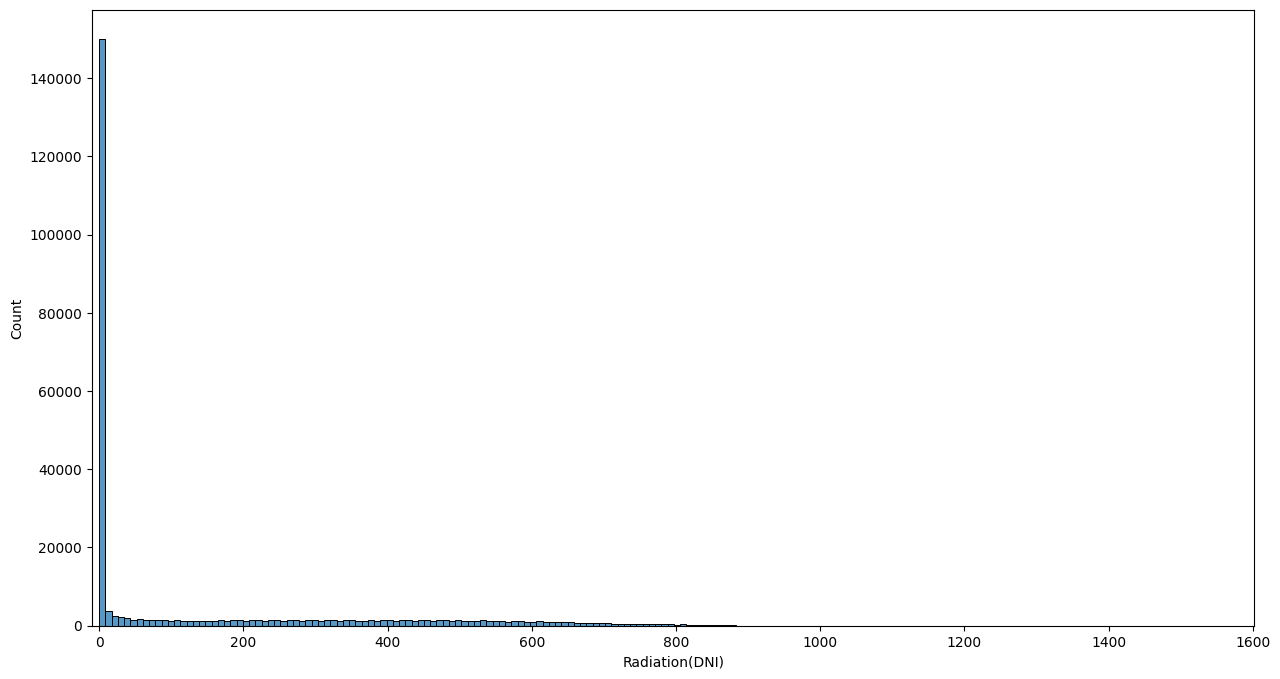

In [9]:
# Create figure and axes
f, ax = plt.subplots(figsize=(15, 8))

sns.histplot(data=dataset['Radiation(DNI)'], ax=ax)
# sns.histplot(data=dataset['Radiation(DNI)'], ax=ax, kde=True)

# Set x-axis limits
plt.xlim([-10, 1602])

# Optional: Show the plot
plt.show()

### Feature Engineering

In [10]:
# dataset['Pressure'] = dataset['Pressure'] / 1000
# dataset.head()
dataset = dataset.drop(['Year'], inplace=False, axis=1)

### Feature Visualization

Text(0.5, 1.0, 'WindSpeed')

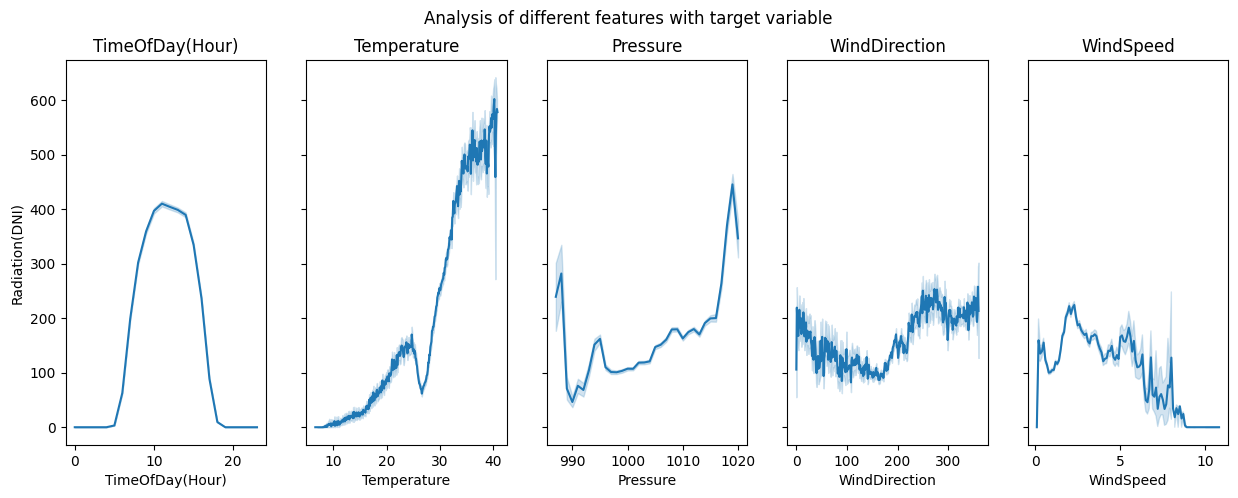

In [11]:
fig, axes = plt.subplots(1, 5, figsize=(15, 5), sharey=True)
fig.suptitle('Analysis of different features with target variable')

sns.lineplot(ax=axes[0], x=dataset['TimeOfDay(Hour)'].values, y=dataset['Radiation(DNI)'].values)
axes[0].set(xlabel='TimeOfDay(Hour)', ylabel = 'Radiation(DNI)')
axes[0].set_title(dataset['TimeOfDay(Hour)'].name)

sns.lineplot(ax=axes[1], x=dataset['Temperature'].values, y=dataset['Radiation(DNI)'].values)
axes[1].set(xlabel='Temperature', ylabel = 'Radiation(DNI)')
axes[1].set_title(dataset['Temperature'].name)

sns.lineplot(ax=axes[2],  x=dataset['Pressure'].values, y=dataset['Radiation(DNI)'].values)
axes[2].set(xlabel='Pressure', ylabel = 'Radiation(DNI)')
axes[2].set_title(dataset['Pressure'].name)

sns.lineplot(ax=axes[3],  x=dataset['WindDirection'].values, y=dataset['Radiation(DNI)'].values)
axes[3].set(xlabel='WindDirection', ylabel = 'Radiation(DNI)')
axes[3].set_title(dataset['WindDirection'].name)

sns.lineplot(ax=axes[4],  x=dataset['WindSpeed'].values, y=dataset['Radiation(DNI)'].values)
axes[4].set(xlabel='WindSpeed', ylabel = 'Radiation(DNI)')
axes[4].set_title(dataset['WindSpeed'].name)

### Pearson Correlation

In [12]:
dataset.head()

MonthOfYear  DayOfYear  TimeOfDay(Hour)  TimeOfDay(Minute)  Temperature  \
0            1          1                0                  0         13.4   
1            1          1                0                 10         13.3   
2            1          1                0                 20         13.2   
3            1          1                0                 30         13.2   
4            1          1                0                 40         13.1   

   DewPoint  DiffuseHorizontalIrradiance(DHI)  \
0      12.8                                 0   
1      12.8                                 0   
2      12.8                                 0   
3      12.8                                 0   
4      12.6                                 0   

   GlobalHorizontalIrradiance(GHI)  SurfaceAlbedo  Pressure  WindDirection  \
0                                0           0.12      1013            340   
1                                0           0.12      1013            340   
2                                0           0.12      1013            341   
3                                0           0.12      1013            341   
4                                0           0.12      1013            342   

   WindSpeed  ClearskyDNI  CloudType  SolarZenithAngle  RelativeHumidity  \
0        1.6            0          0            179.17             96.37   
1        1.6            0          0            177.99             96.99   
2        1.6            0          0            175.77             97.63   
3        1.6            0          0            173.50             97.63   
4        1.6            0          0            171.22             96.97   

   Radiation(DNI)  
0               0  
1               0  
2               0  
3               0  
4               0

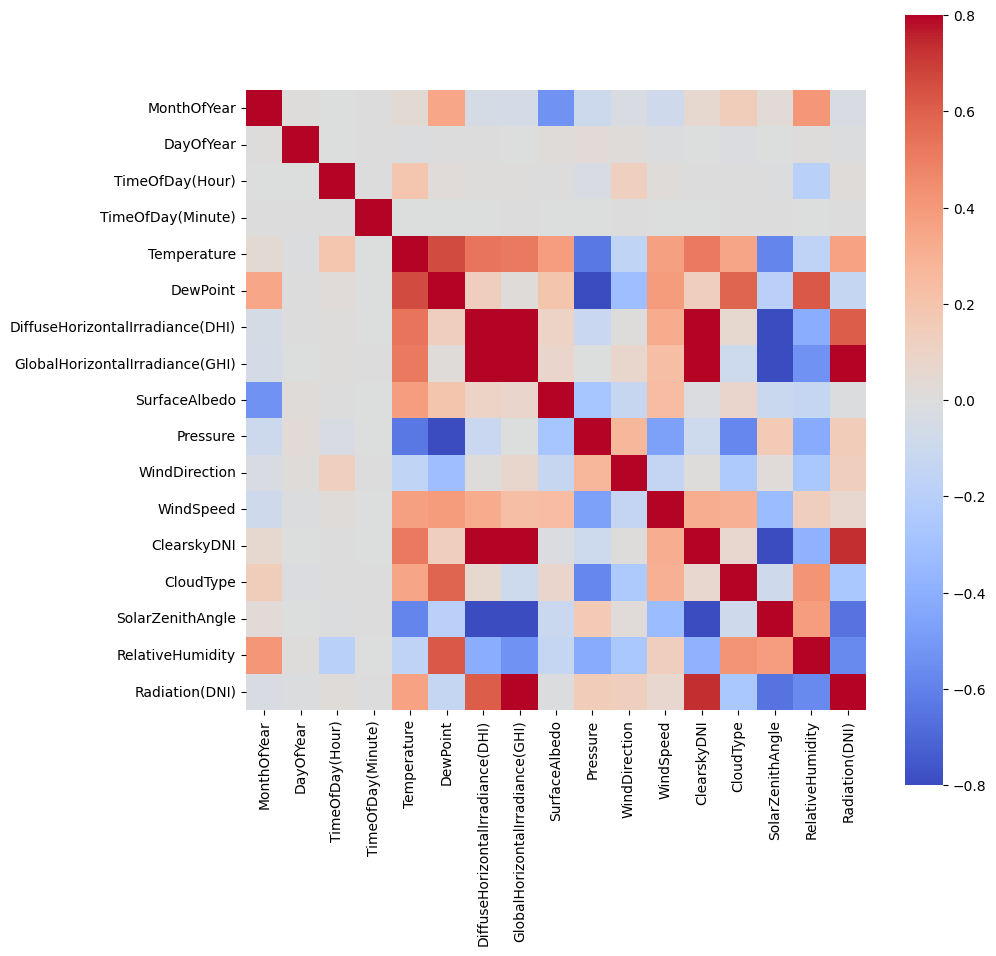

In [13]:
# corrmat = dataset.drop(['MonthOfYear'], inplace=False, axis=1)
corrmat = dataset.corr()
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corrmat, vmin=-.8, vmax=.8, square=True, cmap = 'coolwarm')
plt.show()

### Separating the Independent and Dependent Variables

In [14]:
X = dataset[['MonthOfYear', 'DayOfYear', 'TimeOfDay(Hour)', 'TimeOfDay(Minute)',
            'Temperature', 'DewPoint', 'DiffuseHorizontalIrradiance(DHI)',
            'GlobalHorizontalIrradiance(GHI)', 'SurfaceAlbedo', 'Pressure',
            'WindDirection', 'WindSpeed', 'ClearskyDNI', 'CloudType',
            'SolarZenithAngle', 'RelativeHumidity']]
y = dataset['Radiation(DNI)']

## Multiple Linear Regression (MLR)

### Splitting the Dataset

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 150)

In [16]:
#Fitting the Multiple Linear Regression model
from sklearn.linear_model import LinearRegression

mlr = LinearRegression()
mlr.fit(X_train, y_train)

LinearRegression()

In [17]:
print("Intercept: ", mlr.intercept_)
print("Coefficients:")
list(zip(dataset, mlr.coef_))

Intercept:  -987.7166832175993
Coefficients:


[('MonthOfYear', -0.24591696349221473),
 ('DayOfYear', -0.10048575300903004),
 ('TimeOfDay(Hour)', -0.2151998920226584),
 ('TimeOfDay(Minute)', -0.008797015680397507),
 ('Temperature', -3.4298107488061405),
 ('DewPoint', 4.6843393299600455),
 ('DiffuseHorizontalIrradiance(DHI)', -1.4690746097517675),
 ('GlobalHorizontalIrradiance(GHI)', 1.159748934007968),
 ('SurfaceAlbedo', -816.2011505342298),
 ('Pressure', 1.2806769172905184),
 ('WindDirection', 0.030364476947117306),
 ('WindSpeed', -4.2188570637074365),
 ('ClearskyDNI', 0.15957122143686067),
 ('CloudType', -4.135662101004759),
 ('SolarZenithAngle', -0.37340734326745373),
 ('RelativeHumidity', -1.4020223676920607)]

In [18]:
# Prediction of test set
y_pred_mlr = mlr.predict(X_test)

# Predicted values
print("Prediction for test set: {}".format(y_pred_mlr))

Prediction for test set: [ 40.60167152 157.94196037  70.44491981 ...   9.47164338 -18.34688332
   7.02651312]


### Model Evaluation

In [19]:
from sklearn import metrics
meanAbsoluteError = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSquaredError = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSquaredError = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))

print('R squared: {:.2f}'.format(mlr.score(X, y) *100))
print('Mean Absolute Error:', meanAbsoluteError)
print('Mean Square Error:', meanSquaredError)
print('Root Mean Square Error:', rootMeanSquaredError)

R squared: 92.35
Mean Absolute Error: 44.702883886484535
Mean Square Error: 3909.078076323597
Root Mean Square Error: 62.52262051708643


## Random Forest Regressor

### Splitting the Dataset

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Feature Selection

In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

regressor = RandomForestRegressor(n_estimators = 2)
regressor.fit(X_train, y_train)
feature_importances = regressor.feature_importances_

X_train_opt = X_train.copy()
removed_columns = pd.DataFrame()
models = []
r2s_opt = []

for i in range(0, 5):
    least_important = np.argmin(feature_importances)
    # Remove the least important feature and add it to removed_columns
    removed_feature = X_train_opt.pop(X_train_opt.columns[least_important])
    removed_columns = pd.concat([removed_columns, removed_feature], axis=1)

    regressor.fit(X_train_opt, y_train)
    feature_importances = regressor.feature_importances_
    accuracies = cross_val_score(estimator = regressor,
                                 X = X_train_opt,
                                 y = y_train, cv = 5,
                                 scoring = 'r2')
    r2s_opt = np.append(r2s_opt, accuracies.mean())
    models = np.append(models, ", ".join(list(X_train_opt)))

feature_selection = pd.DataFrame({'Features':models,'r2 Score':r2s_opt})
feature_selection.head()

Features  r2 Score
0  MonthOfYear, DayOfYear, TimeOfDay(Hour), TimeO...  0.999505
1  MonthOfYear, DayOfYear, TimeOfDay(Hour), Tempe...  0.999510
2  MonthOfYear, DayOfYear, Temperature, DewPoint,...  0.999497
3  DayOfYear, Temperature, DewPoint, DiffuseHoriz...  0.999519
4  DayOfYear, Temperature, DewPoint, DiffuseHoriz...  0.999484

### Fitting the Regressor to the Key Features

In [22]:
X_train_best = X_train[['TimeOfDay(Hour)', 'Temperature', 'DiffuseHorizontalIrradiance(DHI)',
                        'GlobalHorizontalIrradiance(GHI)', 'Pressure',
                        'WindDirection', 'WindSpeed', 'ClearskyDNI']]
X_test_best = X_test[['TimeOfDay(Hour)', 'Temperature', 'DiffuseHorizontalIrradiance(DHI)',
                        'GlobalHorizontalIrradiance(GHI)', 'Pressure',
                        'WindDirection', 'WindSpeed', 'ClearskyDNI']]
regressor.fit(X_train_best, y_train)

RandomForestRegressor(n_estimators=2)

### Cross Validation

In [23]:
accuracies = cross_val_score(estimator = regressor, X = X_train_best,y = y_train, cv = 10, scoring = 'r2')
accuracy = accuracies.mean()
print('r2 = {}'.format(accuracy))

r2 = 0.9984820126534965


### Predicting the Test Set

In [24]:
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score

y_pred = regressor.predict(X_test_best)

explained_variance_score = explained_variance_score(y_test, y_pred)
mean_squared_error = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print('explained variance = {}'.format(explained_variance_score))
print('mse = {}'.format(mean_squared_error))
print('r2 = {}'.format(r_squared))

explained variance = 0.9987394385052255
mse = 64.87938063020259
r2 = 0.9987394383311451


### Visualising the Model

In [25]:
# Predicting for whole dataset
dataset['y_pred'] = regressor.predict(dataset[['TimeOfDay(Hour)', 'Temperature', 'DiffuseHorizontalIrradiance(DHI)',
                        'GlobalHorizontalIrradiance(GHI)', 'Pressure',
                        'WindDirection', 'WindSpeed', 'ClearskyDNI']])

# Create Interactive Plot Using Bokeh
from bokeh.plotting import figure, output_notebook, show
from bokeh.models import Range1d
output_notebook()

p = figure(title="Solar Irradiance Predictions",
           x_axis_label='Date and Time',
           y_axis_label='Solar Irradiance',
           x_axis_type="datetime",
           width=1000,  # Set width in pixels
           height=500)  # Set height in pixels

p.x_range = Range1d(dataset.index[0], dataset.index[600])
p.y_range = Range1d(-100, 1800, bounds=(-100, 1800))

p.line(dataset.index, dataset['Radiation(DNI)'], line_width=1)
p.line(dataset.index, dataset['y_pred'], line_width=1, line_color="red")

show(p, notebook_handle = True)

# Solar Irradiance Prediction with Neural Networks (MLP)

In [26]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# Assuming dataset is your DataFrame with the columns
X = dataset[['MonthOfYear', 'DayOfYear', 'TimeOfDay(Hour)', 'TimeOfDay(Minute)',
             'Temperature', 'DewPoint', 'DiffuseHorizontalIrradiance(DHI)',
             'GlobalHorizontalIrradiance(GHI)', 'SurfaceAlbedo', 'Pressure',
             'WindDirection', 'WindSpeed', 'ClearskyDNI', 'CloudType',
             'SolarZenithAngle', 'RelativeHumidity']]
y = dataset['Radiation(DNI)']

# 1. Preprocess the data
# Convert to numpy arrays
X = X.values
y = y.values

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (important for neural networks)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.FloatTensor(y_train).view(-1, 1)  # Reshape to (n_samples, 1)
y_test = torch.FloatTensor(y_test).view(-1, 1)

# 2. Define the MLP model
class MLP(nn.Module):
    def __init__(self, input_size=16):
        super(MLP, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_size, 64),    # Input layer to first hidden layer
            nn.ReLU(),
            nn.Linear(64, 32),            # Second hidden layer
            nn.ReLU(),
            nn.Linear(32, 16),            # Third hidden layer
            nn.ReLU(),
            nn.Linear(16, 1)              # Output layer (1 value for regression)
        )

    def forward(self, x):
        return self.layers(x)

# 3. Initialize model, loss, and optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  # Use GPU if available
model = MLP(input_size=16).to(device)
criterion = nn.MSELoss()  # Mean Squared Error for regression
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer

# Move data to GPU if available
X_train, X_test = X_train.to(device), X_test.to(device)
y_train, y_test = y_train.to(device), y_test.to(device)

# 4. Training loop
num_epochs = 200
batch_size = 32
n_samples = X_train.size(0)

for epoch in range(num_epochs):
    model.train()
    for i in range(0, n_samples, batch_size):
        batch_X = X_train[i:i+batch_size]
        batch_y = y_train[i:i+batch_size]

        # Forward pass
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Print loss every 20 epochs
    if (epoch + 1) % 20 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# 5. Evaluate the model
model.eval()
with torch.no_grad():
    y_pred_train = model(X_train)
    y_pred_test = model(X_test)

    train_loss = criterion(y_pred_train, y_train).item()
    test_loss = criterion(y_pred_test, y_test).item()

    print(f'Train MSE: {train_loss:.4f}')
    print(f'Test MSE: {test_loss:.4f}')

# Optional: Calculate R² score (for regression "accuracy")
from sklearn.metrics import r2_score
y_test_np = y_test.cpu().numpy()
y_pred_test_np = y_pred_test.cpu().numpy()
r2 = r2_score(y_test_np, y_pred_test_np)
print(f'Test R² Score: {r2:.4f}')

Epoch [20/200], Loss: 3.8298
Epoch [40/200], Loss: 0.4869
Epoch [60/200], Loss: 0.6278
Epoch [80/200], Loss: 1.6613
Epoch [100/200], Loss: 0.2002
Epoch [120/200], Loss: 0.0256
Epoch [140/200], Loss: 0.0000
Epoch [160/200], Loss: 1.0270
Epoch [180/200], Loss: 1.0015
Epoch [200/200], Loss: 0.5122
Train MSE: 5.6195
Test MSE: 6.2940
Test R² Score: 0.9999
